## РК1 - ТМО. Вариант 12
номер датасета - 4
номер задачи - 2 Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

## Основные атрибуты:
1. age — возраст
2. sex — пол
3. chest pain type — тип боли в груди (4 значения)
4. resting blood pressure — артериальное давление в состоянии покоя
5. serum cholestoral in mg/dl — уровень холестерина в сыворотке крови (мг/дл)
6. fasting blood sugar > 120 mg/dl — уровень сахара в крови натощак > 120 мг/дл
7. resting electrocardiographic results — результаты ЭКГ в состоянии покоя (значения 0, 1, 2)
8. maximum heart rate achieved — максимальная достигнутая частота сердечных сокращений
9. exercise induced angina — стенокардия, вызванная физической нагрузкой
10. oldpeak — депрессия ST сегмента, вызванная физической нагрузкой относительно состояния покоя
11. the slope of the peak exercise ST segment — наклон пикового ST сегмента при физической нагрузке
12. number of major vessels (0-3) colored by flourosopy — количество крупных сосудов (0-3), окрашенных флюороскопией
13. thal — состояние талия:
    0 = нормальное
    1 = фиксированный дефект
    2 = обратимый дефект

## Загрузка датасета

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kaggle
kaggle.api.dataset_download_files("johnsmith88/heart-disease-dataset", path="datasets", unzip=True)


Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [286]:
import pandas as pd

df = pd.read_csv("datasets/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Создание категориального признака

In [287]:
df["chol_category"] = pd.cut(df["chol"], bins=[0, 200, 239, float("inf")], labels=["низкий", "средний", "высокий"])

In [288]:
df = df.drop('chol', axis = 1)
df

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52,1,0,125,0,1,168,0,1.0,2,2,3,0,средний
1,53,1,0,140,1,0,155,1,3.1,0,0,3,0,средний
2,70,1,0,145,0,1,125,1,2.6,0,0,3,0,низкий
3,61,1,0,148,0,1,161,0,0.0,2,1,3,0,средний
4,62,0,0,138,1,1,106,0,1.9,1,3,2,0,высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,0,1,164,1,0.0,2,0,2,1,средний
1021,60,1,0,125,0,0,141,1,2.8,1,1,3,0,высокий
1022,47,1,0,110,0,0,118,1,1.0,1,1,2,0,высокий
1023,50,0,0,110,0,0,159,0,0.0,2,0,2,1,высокий


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1025 non-null   int64   
 1   sex            1025 non-null   int64   
 2   cp             1025 non-null   int64   
 3   trestbps       1025 non-null   int64   
 4   fbs            1025 non-null   int64   
 5   restecg        1025 non-null   int64   
 6   thalach        1025 non-null   int64   
 7   exang          1025 non-null   int64   
 8   oldpeak        1025 non-null   float64 
 9   slope          1025 non-null   int64   
 10  ca             1025 non-null   int64   
 11  thal           1025 non-null   int64   
 12  target         1025 non-null   int64   
 13  chol_category  1025 non-null   category
dtypes: category(1), float64(1), int64(12)
memory usage: 105.4 KB


## Внесение пропусков в возраст и chol_category

In [290]:
import numpy as np

def introduce_nan(data, missing_rate=0.1, columns=['age', 'chol_category']):
    df_copy = data.copy()
    for col in columns:
        if col in df_copy.columns: 
            mask = np.random.rand(len(df_copy)) < missing_rate  
            df_copy.loc[mask, col] = np.nan
    return df_copy

df_missing = introduce_nan(df, missing_rate=0.15, columns=['age', 'chol_category'])

In [291]:
df_missing

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52.0,1,0,125,0,1,168,0,1.0,2,2,3,0,средний
1,NaN,1,0,140,1,0,155,1,3.1,0,0,3,0,средний
2,70.0,1,0,145,0,1,125,1,2.6,0,0,3,0,NaN
3,61.0,1,0,148,0,1,161,0,0.0,2,1,3,0,средний
4,62.0,0,0,138,1,1,106,0,1.9,1,3,2,0,высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140,0,1,164,1,0.0,2,0,2,1,средний
1021,60.0,1,0,125,0,0,141,1,2.8,1,1,3,0,высокий
1022,47.0,1,0,110,0,0,118,1,1.0,1,1,2,0,высокий
1023,50.0,0,0,110,0,0,159,0,0.0,2,0,2,1,высокий


In [292]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            867 non-null    float64 
 1   sex            1025 non-null   int64   
 2   cp             1025 non-null   int64   
 3   trestbps       1025 non-null   int64   
 4   fbs            1025 non-null   int64   
 5   restecg        1025 non-null   int64   
 6   thalach        1025 non-null   int64   
 7   exang          1025 non-null   int64   
 8   oldpeak        1025 non-null   float64 
 9   slope          1025 non-null   int64   
 10  ca             1025 non-null   int64   
 11  thal           1025 non-null   int64   
 12  target         1025 non-null   int64   
 13  chol_category  881 non-null    category
dtypes: category(1), float64(2), int64(11)
memory usage: 105.4 KB


# Заполнение пропусков для категориального признака

я выполню упрощенный вариант, заполню все пропуски в количественных признаках медианой через simpleImputer.Медианой буду заполнять так как она устойчива к выбросам. Заполнять категориальные признаки буду с помощью модели KNN. Но перед обучением модели сначала разделю выборку на трейн и тест, причем к тесту отнесу все значения, где пропущен признак chol_category

In [293]:
num_x = df_missing.drop(df_missing.columns[-1], axis=1) # извлекаем количественные признаки
cat_x = df_missing[df_missing.columns[-1]]#извлекаем категориальные признаки

In [294]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy="median")
num_x_impute = imputer_num.fit_transform(num_x)

- через SimpleImputer заполнила пропуски количественных признаков медианами

In [295]:
df_prep = pd.DataFrame(num_x_impute, columns = num_x.columns)
df_prep['chol_category'] = cat_x
df_prep

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52.0,1.0,0.0,125.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0,средний
1,56.0,1.0,0.0,140.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0,средний
2,70.0,1.0,0.0,145.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0,NaN
3,61.0,1.0,0.0,148.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0,средний
4,62.0,0.0,0.0,138.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0,высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0,средний
1021,60.0,1.0,0.0,125.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0,высокий
1022,47.0,1.0,0.0,110.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0,высокий
1023,50.0,0.0,0.0,110.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0,высокий


In [296]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1025 non-null   float64 
 1   sex            1025 non-null   float64 
 2   cp             1025 non-null   float64 
 3   trestbps       1025 non-null   float64 
 4   fbs            1025 non-null   float64 
 5   restecg        1025 non-null   float64 
 6   thalach        1025 non-null   float64 
 7   exang          1025 non-null   float64 
 8   oldpeak        1025 non-null   float64 
 9   slope          1025 non-null   float64 
 10  ca             1025 non-null   float64 
 11  thal           1025 non-null   float64 
 12  target         1025 non-null   float64 
 13  chol_category  881 non-null    category
dtypes: category(1), float64(13)
memory usage: 105.4 KB


In [297]:
from sklearn.preprocessing import LabelEncoder
df_prep['chol_category'] = df_prep['chol_category'].astype('object')#преобразуем категориальный признак, в тип объект, иначе ругается(
le = LabelEncoder()#кодируем категории
chol_col = df_prep['chol_category']
not_null_mask = chol_col.notna()#создаем маску, оставляем только элементы, которые не равны Nan
df_prep.loc[not_null_mask, 'chol_category'] = le.fit_transform(chol_col[not_null_mask])#кодируем только те строки категориального признака, которые попадают под маску
df_prep['chol_category'] = df_prep['chol_category'].astype('category')#преобразуем тип признака обратно в категориальный

In [298]:
df_prep

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52.0,1.0,0.0,125.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0,2
1,56.0,1.0,0.0,140.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0,2
2,70.0,1.0,0.0,145.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0,NaN
3,61.0,1.0,0.0,148.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0,2
4,62.0,0.0,0.0,138.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0,2
1021,60.0,1.0,0.0,125.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0,0
1022,47.0,1.0,0.0,110.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0,0
1023,50.0,0.0,0.0,110.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0,0


In [299]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1025 non-null   float64 
 1   sex            1025 non-null   float64 
 2   cp             1025 non-null   float64 
 3   trestbps       1025 non-null   float64 
 4   fbs            1025 non-null   float64 
 5   restecg        1025 non-null   float64 
 6   thalach        1025 non-null   float64 
 7   exang          1025 non-null   float64 
 8   oldpeak        1025 non-null   float64 
 9   slope          1025 non-null   float64 
 10  ca             1025 non-null   float64 
 11  thal           1025 non-null   float64 
 12  target         1025 non-null   float64 
 13  chol_category  881 non-null    category
dtypes: category(1), float64(13)
memory usage: 105.4 KB


## Разделим выборку на трейн и тест

In [300]:
train_df = df_prep[df_prep['chol_category'].notna()].copy()
test_df = df_prep[df_prep['chol_category'].isna()].copy()

In [301]:
test_df_X = test_df.drop(['chol_category', 'target'], axis=1)

In [302]:
test_df_X

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2,70.0,1.0,0.0,145.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0
10,71.0,0.0,0.0,112.0,0.0,1.0,125.0,0.0,1.6,1.0,0.0,2.0
36,51.0,1.0,3.0,125.0,0.0,0.0,125.0,1.0,1.4,2.0,1.0,2.0
48,66.0,0.0,2.0,146.0,0.0,0.0,152.0,0.0,0.0,1.0,1.0,2.0
50,58.0,0.0,3.0,150.0,1.0,0.0,162.0,0.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,71.0,0.0,1.0,160.0,0.0,1.0,162.0,0.0,0.4,2.0,2.0,2.0
991,60.0,1.0,0.0,117.0,1.0,1.0,160.0,1.0,1.4,2.0,2.0,3.0
992,50.0,0.0,0.0,110.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0
993,43.0,1.0,0.0,132.0,1.0,0.0,143.0,1.0,0.1,1.0,4.0,3.0


In [303]:
train_df_X = train_df.drop(['chol_category', 'target'], axis=1)
train_df_y = train_df[train_df.columns[-1]]

## Нормализуем количественные признаки

In [304]:
from sklearn.preprocessing import MinMaxScaler

In [305]:
train_df_y

0       2
1       2
3       2
4       0
5       0
       ..
1020    2
1021    0
1022    0
1023    0
1024    1
Name: chol_category, Length: 881, dtype: category
Categories (3, int64): [0, 1, 2]

In [306]:
scaler = MinMaxScaler()
train_df_X_scaled = scaler.fit_transform(train_df_X)
test_df_X_scaled = scaler.transform(test_df_X)

## Обучаем модель KNN
и с помощью грид серча подбираем подходящие параметры

In [307]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [308]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid = {
    'n_neighbors':  list(range(1, 100))
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(train_df_X_scaled, train_df_y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [309]:
knn_best_param = KNeighborsClassifier(n_neighbors=1)
knn_best_param.fit(train_df_X_scaled, train_df_y)

KNeighborsClassifier(n_neighbors=1)

Предсказываем на тесте:

In [310]:
predicted_chol = knn_best_param.predict(test_df_X_scaled)

## Заменяем пропущенные признаки на предсказанные в исходном датасете

In [311]:
df_prep.loc[df_prep['chol_category'].isna(), 'chol_category'] = predicted_chol

In [312]:
df_prep

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52.0,1.0,0.0,125.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0,2
1,56.0,1.0,0.0,140.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0,2
2,70.0,1.0,0.0,145.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0,1
3,61.0,1.0,0.0,148.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0,2
4,62.0,0.0,0.0,138.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0,2
1021,60.0,1.0,0.0,125.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0,0
1022,47.0,1.0,0.0,110.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0,0
1023,50.0,0.0,0.0,110.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0,0


In [313]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1025 non-null   float64 
 1   sex            1025 non-null   float64 
 2   cp             1025 non-null   float64 
 3   trestbps       1025 non-null   float64 
 4   fbs            1025 non-null   float64 
 5   restecg        1025 non-null   float64 
 6   thalach        1025 non-null   float64 
 7   exang          1025 non-null   float64 
 8   oldpeak        1025 non-null   float64 
 9   slope          1025 non-null   float64 
 10  ca             1025 non-null   float64 
 11  thal           1025 non-null   float64 
 12  target         1025 non-null   float64 
 13  chol_category  1025 non-null   category
dtypes: category(1), float64(13)
memory usage: 105.4 KB


## Проверка качества классификатора на трейне с помощью кросс валидации

In [314]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_best_param, train_df_X_scaled, train_df_y, cv=5)
cv_scores.mean()

0.9352786337955828

## Jointplot для age и trestbps

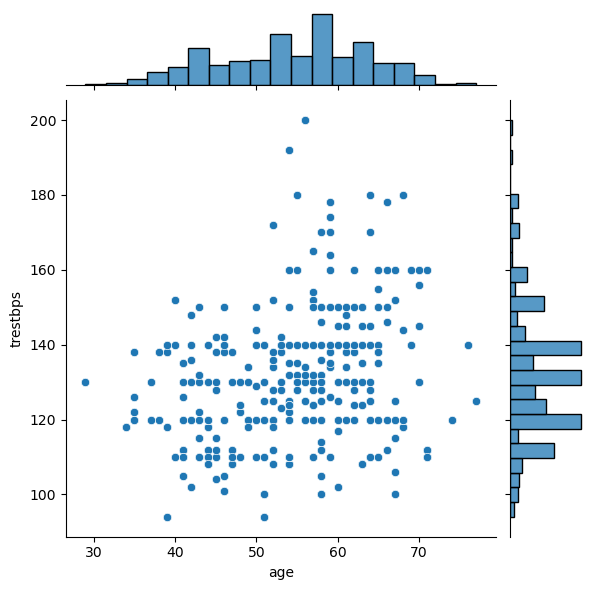

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x='age', y='trestbps', data=df, kind='scatter')
plt.show()